# Jigsaw Toxic Comment Classification: Preliminary Analysis + ML Classification

Chesie Yu

5/8/2023

<style type = "text/css">  
    body {
        font-family: "Serif"; 
        font-size: 12pt;
    }
    em {
        color: #4E7F9E;
    }
    strong {
        color: #436D87;
    }
    .jp-RenderedHTMLCommon a:link { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon a:visited { 
        color: #94C1C9;
    }
    li {
        color: #4E7F9E;
    }
    .jp-RenderedHTMLCommon code {
        color: #4E7F9E;
    }  
    img {
        display: block;
        margin: auto;
    } 
</style>

In [1]:
# Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
import time, warnings

## I. Data Exploration

_The objective of this study is to detect toxic speech from text, using the Jigsaw toxic comment dataset obtained from [Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data).  This notebook will focus on using machine learning models to identify only toxic subtype._  

### 1.1 Training Set

In [8]:
# Load the data
train = pd.read_csv("data/train.csv")

# Print a preview
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
# Check the dimensions
print(f"Number of rows: {train.shape[0]}\n"
      f"Number of columns: {train.shape[1]}")

# Check for missing values
print(f"Number of missing values: {train.isna().sum().sum()}")

Number of rows: 159571
Number of columns: 8
Number of missing values: 0


_Our training corpus consists of **159,571 Wikipedia comments**, pre-labeled to identify 6 subtypes of toxic behavior: **toxic, severe toxic, obscene, threat, insult, identity hate**._

_Commonly observed in content moderation challenges, the data exhibits **class imbalance** with toxic comments representing the minority, particularly for threat and identity hate._  

In [15]:
# Inspect class distribution
cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
classes = [train[col].value_counts(normalize = True) for col in cols]
pd.DataFrame(classes, index = cols)

,0,1
toxic,0.904156,0.095844
severe_toxic,0.990004,0.009996
obscene,0.947052,0.052948
threat,0.997004,0.002996
insult,0.950636,0.049364
identity_hate,0.991195,0.008805


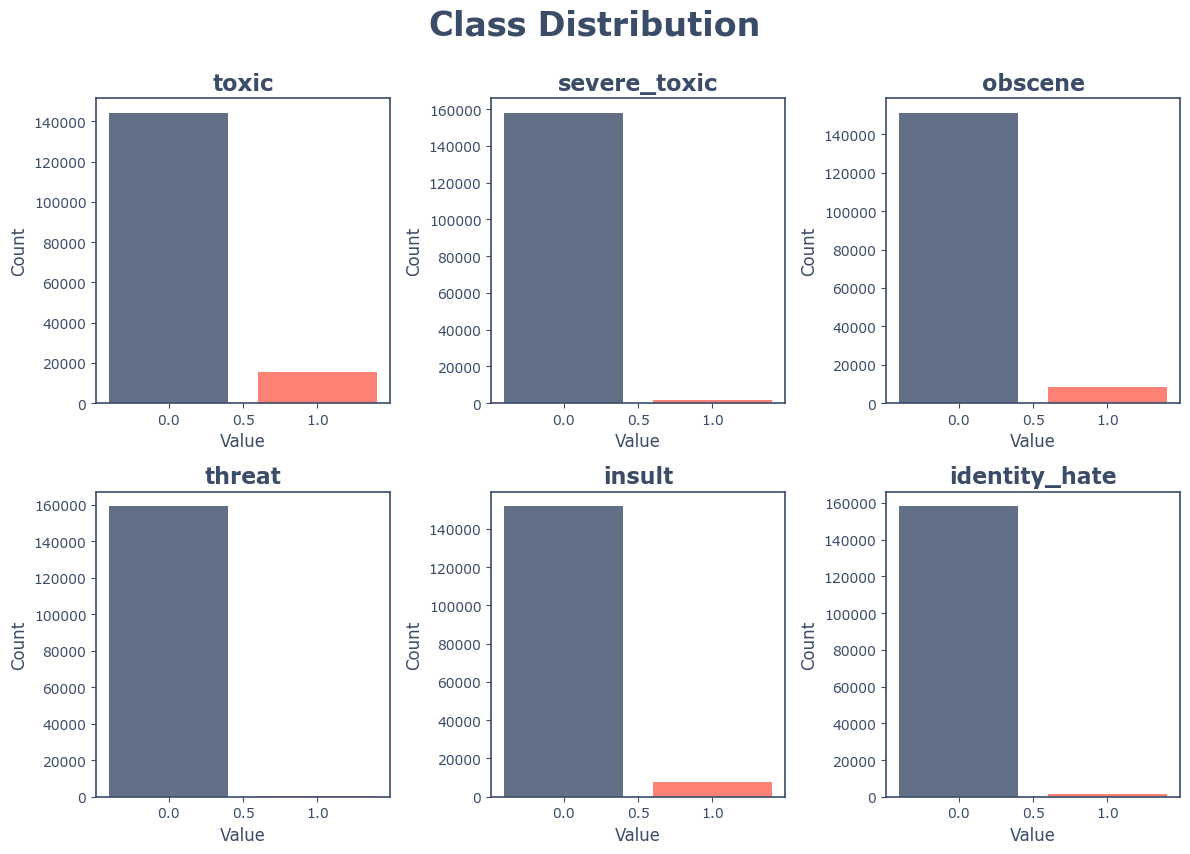

In [17]:
# Set up the figure with subplots
plt.rcParams.update({"font.family": "Verdana"})
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Visualize the class distribution for each column
for i, col in enumerate(cols):
    counts = train[col].value_counts()
    axs[i // 3, i % 3].bar(counts.index, counts.values, color = ["#617086", "#FE8175"])
    axs[i // 3, i % 3].set_title(col, size = 16, color = "#3A4C68", weight = "bold")
    axs[i // 3, i % 3].set_xlabel("Value", size = 12, color = "#3A4C68")
    axs[i // 3, i % 3].set_ylabel("Count", size = 12, color = "#3A4C68")
    axs[i // 3, i % 3].tick_params(axis = "x", colors = "#3A4C68")
    axs[i // 3, i % 3].tick_params(axis = "y", colors = "#3A4C68")
    # Change border color 
    for spine in axs[i // 3, i % 3].spines.values():
        spine.set_edgecolor("#3A4C68")
        spine.set_linewidth(1.2)

# Display the plot
fig.suptitle("Class Distribution", size = 24, color = "#3A4C68", weight = "bold", y = 1) # Assign main title
fig.tight_layout()

### 1.2 Test Set

In [21]:
# Load the data
X_test = pd.read_csv("data/test.csv")

# Print a preview
X_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [22]:
# Check the dimensions
print(f"Number of rows: {X_test.shape[0]}\n"
      f"Number of columns: {X_test.shape[1]}")

# Check for missing values
print(f"Number of missing values: {X_test.isna().sum().sum()}")

Number of rows: 153164
Number of columns: 2
Number of missing values: 0


In [26]:
# Load the data
y_test = pd.read_csv("data/test_labels.csv")

# Print a preview
y_test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [28]:
# Check the dimensions
print(f"Number of rows: {y_test.shape[0]}\n"
      f"Number of columns: {y_test.shape[1]}")

# Check for missing values
print(f"Number of missing values: {y_test.isna().sum().sum()}")

Number of rows: 153164
Number of columns: 7
Number of missing values: 0


_Value of **-1** indicates that it **will not be considered in scoring** and will therefore be removed in the following step:_  

In [32]:
# Remove entries with -1
X_test = X_test.loc[~(y_test == -1).any(axis = 1)]
y_test = y_test.loc[~(y_test == -1).any(axis = 1)]

In [34]:
# Check the dimensions
print(f"Number of rows: {X_test.shape[0]}\n"
      f"Number of columns: {X_test.shape[1]}")
print(f"Number of rows: {y_test.shape[0]}\n"
      f"Number of columns: {y_test.shape[1]}")

Number of rows: 63978
Number of columns: 2
Number of rows: 63978
Number of columns: 7


_The test set consists of **63,978** comments._  

___

## 2. Data Preparation

### 2.1 Train-Dev-Test Split

_To begin, we will split the dataset into **training, development, and test sets** to ensure robust evaluation and fine-tuning of our machine learning models._  

In [42]:
# Specify the features and labels
X_train = train["comment_text"]
y_train = train["toxic"].values
X_test = X_test["comment_text"]
y_test = y_test["toxic"].values

In [44]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Perform train-dev split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=10)
print(f"Training Set: {X_train.shape, y_train.shape}")
print(f"Development Set: {X_dev.shape, y_dev.shape}") 
print(f"Test Set: {X_test.shape, y_test.shape}") 

Training Set: ((127656,), (127656,))
Development Set: ((31915,), (31915,))
Test Set: ((63978,), (63978,))


### 2.2 Text Preprocessing 

_To prepare the text data for model training and evaluation, we will preprocess the dataset by **removing noise** and **normalizing the text**._  

In [48]:
# Import the libraries
import re, string  
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [50]:
# Define cleaning function
def clean(text):
    # Remove special characters and numbers
    text = re.sub("[^a-zA-Z\s]", "", text.lower())
    
    # Remove new line
    text = re.sub("\n", " ", text)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [52]:
# Clean the text
X_train = X_train.apply(clean)
X_dev = X_dev.apply(clean)
X_test = X_test.apply(clean)

### 2.3 Vectorization

_Next, we will perform **TF-IDF vectorization** and convert the output into **sparse matrices** to prepare the cleaned text for model training._  

In [55]:
# Import the library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [56]:
# Set up the vectorizer  
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=5000)

# Create the DTM
X_train_tfidf = tfidf.fit_transform(X_train)
X_dev_tfidf = tfidf.transform(X_dev)
X_test_tfidf = tfidf.transform(X_test)

In [57]:
# Import sparse library
from scipy import sparse

# Convert DTM to sparse matrices
X_train = sparse.hstack([X_train_tfidf]).tocsr()
X_dev = sparse.hstack([X_dev_tfidf]).tocsr()
X_test = sparse.hstack([X_test_tfidf]).tocsr()

print(f"Training Set: {X_train.shape, y_train.shape}")
print(f"Development Set: {X_dev.shape, y_dev.shape}") 
print(f"Test Set: {X_test.shape, y_test.shape}") 

Training Set: ((127656, 5000), (127656,))
Development Set: ((31915, 5000), (31915,))
Test Set: ((63978, 5000), (63978,))


### 2.4 Oversampling (SMOTE)

_Given the significant **class imbalance** in our dataset, with toxic comments being the minority, we will apply **SMOTE** for **oversampling**._  

In [60]:
# Import the library
from imblearn.over_sampling import SMOTE

In [61]:
# Oversample the training set 
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

___

## 3. ML Model

In [66]:
# Load the packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from joblib import dump, load

In [67]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

### 3.0 Baseline Models

_First, we will train the models using **default hyperparameters** on the training set and evaluate their performance on the development set to **establish a baseline**.  This gives us an idea of their performance without any tuning._  

_For evaluation, we will adopt a balanced approach and prioritize the **F1 score** as the key metric.  Precision and recall inform decision-making in targeted aspects: low precision restricts information access and free speech by systematically flagging harmless comments; low recall leads to proliferation of toxic hubs due to inability to capture toxicity.  We hope to achieve the optimal equilibrium between freedom of speech and safe online environment for users._  

In [71]:
def train_val(estimator, param_dist = None, n_iter = 60, cv = 5, 
              X_train = X_train, y_train = y_train,
              X_val = X_dev, y_val = y_dev, verbose = True):
    """
    Define function train_val that trains a given estimator with specified hyperparameters
    and evaluate its performance.  If a param_dist is given, the function performs a 
    random search for the best hyperparameters using the given distribution. 
    
    The function takes in eight arguments:
        estimator: The class of the estimator used 
        param_dist: The distribution of hyperparameters for random search.  If none, no 
                    search will be performed; the model will be fit using default settings
        n_iter: Number of iterations for random search (default = 60)
        cv: Number of folds for cross-validation (default = 5)
        X_train: Input matrix for training set (default = X_train)
        y_train: Output vector for training set (default = y_train) 
        X_val: Input matrix for validation set (default = X_dev)
        y_val: Output vector for validation set (default = y_dev)
        verbose: Whether to print the training result (default = True)
    
    The function will return a pandas DataFrame of the training results.
    """
    # Start timing
    start_time = time.time()
    
    # Initialize the estimator
    m = estimator()
    if verbose:
        print(f"-------- {estimator.__name__} --------")
    
    # Perform random search if given param_dist
    if param_dist:
        warnings.filterwarnings("ignore")
        rs = RandomizedSearchCV(estimator = m,
                                param_distributions = param_dist, 
                                scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
                                n_iter = n_iter, cv = cv, refit = "f1", 
                                verbose = 0)
        rs.fit(X_train, y_train)

        # Find the best hyperparameters
        if verbose:
            print(f"Best hyperparameters: {rs.best_params_}")
            print(f"Best score: {rs.best_score_:3f}")

        # Initialize the estimator with best hyperparameters
        m = estimator(**rs.best_params_)
    
    # Fit the model on training set 
    m.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = m.predict(X_val)
    
    # Evaluate the result
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    
    # End timing 
    end_time = time.time()
    
    if verbose: 
        print(f"Validation Accuracy: {accuracy:.3f}")
        print(f"Validation Precision: {precision:.3f}")
        print(f"Validation Recall: {recall:.3f}")
        print(f"Validation F1 Score: {f1:.3f}")
        print(f"Validation ROC AUC Score: {roc_auc:.3f}")
        print(f"Runtime: {end_time - start_time}")
        print("------------------------------\n")
    
    # Store the result in a DataFrame
    if param_dist:
        result = pd.DataFrame({"estimator": [estimator.__name__],
                               "best_params": [rs.best_params_],
                               "accuracy": [accuracy],
                               "precision": [precision],
                               "recall": [recall],
                               "f1": [f1],
                               "roc_auc": [roc_auc],
                               "y_pred": [y_pred]})
    else:
        result = pd.DataFrame({"estimator": [estimator.__name__],
                               "best_params": ["default"],
                               "accuracy": [accuracy],
                               "precision": [precision],
                               "recall": [recall],
                               "f1": [f1],
                               "roc_auc": [roc_auc],
                               "y_pred": [y_pred]})
    
    return result

In [72]:
## Validation Result

# Define the models and corresponding parameter distributions
models = {"Multinomial Naive Bayes": (MultinomialNB, None, 1),
          "Logistic Regression": (LogisticRegression, None, 1),
          "K-Nearest Neighbors": (KNeighborsClassifier, None, 1),
          "Decision Tree": (DecisionTreeClassifier, None, 1),
          "Gradient Boosting": (GradientBoostingClassifier, None, 1),
          "Random Forest": (RandomForestClassifier, None, 1),
          "Support Vector Machine": (SVC, None, 1),
          "MLP Classifier": (MLPClassifier, None, 1)}

# Create empty list of results
results = []

# Loop through the models and append the results
for name, (model, param, cv) in models.items():
    result = train_val(model, param, cv, verbose = True)
    result["model"] = name
    results.append(result)

results_df = pd.concat(results, ignore_index = True)
results_df.sort_values("f1", ascending = False)

-------- MultinomialNB --------
Validation Accuracy: 0.899
Validation Precision: 0.480
Validation Recall: 0.837
Validation F1 Score: 0.610
Validation ROC AUC Score: 0.871
Runtime: 0.06922006607055664
------------------------------

-------- LogisticRegression --------


/Users/chesie/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.906
Validation Precision: 0.501
Validation Recall: 0.837
Validation F1 Score: 0.627
Validation ROC AUC Score: 0.875
Runtime: 1.706732988357544
------------------------------

-------- KNeighborsClassifier --------
Validation Accuracy: 0.325
Validation Precision: 0.115
Validation Recall: 0.924
Validation F1 Score: 0.205
Validation ROC AUC Score: 0.594
Runtime: 268.9105598926544
------------------------------

-------- DecisionTreeClassifier --------
Validation Accuracy: 0.896
Validation Precision: 0.466
Validation Recall: 0.700
Validation F1 Score: 0.559
Validation ROC AUC Score: 0.808
Runtime: 68.88250398635864
------------------------------

-------- GradientBoostingClassifier --------
Validation Accuracy: 0.934
Validation Precision: 0.650
Validation Recall: 0.646
Validation F1 Score: 0.648
Validation ROC AUC Score: 0.805
Runtime: 165.39056420326233
------------------------------

-------- RandomForestClassifier --------
Validation Accuracy: 0.934
Validation Pre

,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred,model
6,SVC,default,0.948488,0.750368,0.678975,0.712889,0.827744,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Support Vector Machine
7,MLPClassifier,default,0.942786,0.687659,0.719228,0.703089,0.842630,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",MLP Classifier
5,RandomForestClassifier,default,0.934482,0.638510,0.701597,0.668569,0.830147,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",Random Forest
4,GradientBoostingClassifier,default,0.933981,0.650485,0.646374,0.648423,0.805130,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Gradient Boosting
1,LogisticRegression,default,0.906220,0.501295,0.837325,0.627133,0.875354,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Logistic Regression
0,MultinomialNB,default,0.899138,0.479687,0.836660,0.609771,0.871147,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",Multinomial Naive Bayes
3,DecisionTreeClassifier,default,0.896130,0.465781,0.699601,0.559234,0.808083,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Decision Tree
2,KNeighborsClassifier,default,0.325270,0.115378,0.924484,0.205153,0.593724,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",K-Nearest Neighbors


### 3.1 Hyperparameter Tuning

_Due to time and resource constraints, we will focus on fine-tuming the **MultinomialNB, LogisticRegression, and GradientBoostingClassifier** models, which demonstrated **optimal performance with minimal training time** in the baseline results._  

#### Naive Bayes

In [88]:
# Baseline performance
train_val(MultinomialNB, None, cv = 1)

-------- MultinomialNB --------
Validation Accuracy: 0.899
Validation Precision: 0.480
Validation Recall: 0.837
Validation F1 Score: 0.610
Validation ROC AUC Score: 0.871
Runtime: 0.10354781150817871
------------------------------



,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred
0,MultinomialNB,default,0.899138,0.479687,0.83666,0.609771,0.871147,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


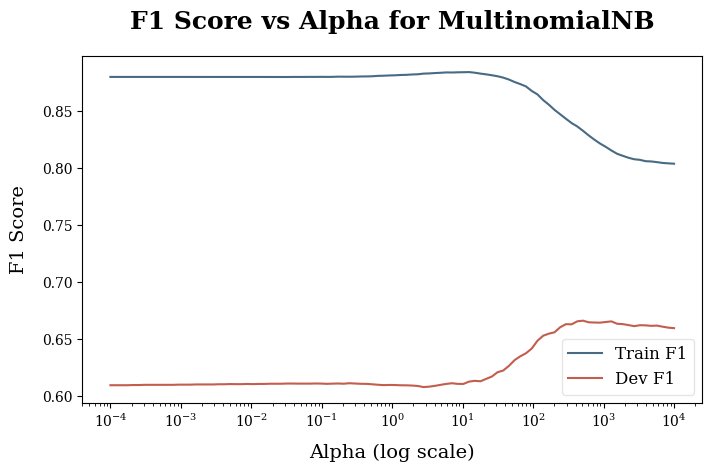

In [90]:
# Initialize lists to store metrics
train_metric = []
dev_metric = []
alphas = np.logspace(-4, 4, 100)

# Loop through each alpha value
for alpha in alphas:
    # Initialize the model with the current alpha
    nb = MultinomialNB(alpha=alpha)
    
    # Train the model
    model = nb.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    dev_pred = model.predict(X_dev)
    
    # Compute F1 scores
    train_metric.append(f1_score(y_train, train_pred))
    dev_metric.append(f1_score(y_dev, dev_pred))

# Create the plot
plt.rcParams.update({"font.family": "serif"})
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(alphas, train_metric, color="#486A82", label="Train F1")
ax.plot(alphas, dev_metric, color="#C35D4E", label="Dev F1")
ax.set_title("F1 Score vs Alpha for MultinomialNB", size=18, weight="bold", pad=20)
ax.set_xlabel("Alpha (log scale)", size=14, labelpad=10)
ax.set_ylabel("F1 Score", size=14, labelpad=10)
ax.set_xscale("log")
ax.legend(loc="best", fontsize=12, framealpha=0.5)

plt.show()

In [98]:
# Randomized Search -- {'alpha': 201.0}}
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

# Define the parameter distribution
nb_param = {"alpha": np.linspace(200, 1000, 801)}

# Train the model
result_nb = train_val(MultinomialNB, nb_param, n_iter = 200, cv = 5)

-------- MultinomialNB --------
Best hyperparameters: {'alpha': 201.0}
Best score: 0.846231
Validation Accuracy: 0.923
Validation Precision: 0.568
Validation Recall: 0.775
Validation F1 Score: 0.656
Validation ROC AUC Score: 0.857
Runtime: 95.7673647403717
------------------------------



In [100]:
## Validation

# Define the parameter distribution
nb_param = {"alpha": [201.0]}

# Train the model
result_nb = train_val(MultinomialNB, nb_param, n_iter = 1, cv = 5)

-------- MultinomialNB --------
Best hyperparameters: {'alpha': 201.0}
Best score: 0.846231
Validation Accuracy: 0.923
Validation Precision: 0.568
Validation Recall: 0.775
Validation F1 Score: 0.656
Validation ROC AUC Score: 0.857
Runtime: 0.6542737483978271
------------------------------



In [102]:
## Final Evaluation on Test Set

# Initialize the estimator with best hyperparameters
nb = MultinomialNB(alpha = 201)
    
# Fit the model on training set 
nb.fit(X_train, y_train)

# Make predictions on test set
y_pred = nb.predict(X_test)
    
# Final evaluation 
print(f"-------- MultinomialNB --------")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print("------------------------------\n")

-------- MultinomialNB --------
Test Accuracy: 0.867
Test Precision: 0.406
Test Recall: 0.853
Test F1 Score: 0.551
Test ROC AUC Score: 0.861
------------------------------



_The fine-tuned MultinomialNB model, adjusted with `alpha = 201`, improved its validation F1 score from 0.610 to **0.656**.  The final evaluation on test set yielded an F1 score of **0.551**._  

#### Logistic Regression

In [104]:
# Baseline performance
train_val(LogisticRegression, None, cv = 1)

-------- LogisticRegression --------
Validation Accuracy: 0.906
Validation Precision: 0.501
Validation Recall: 0.838
Validation F1 Score: 0.627
Validation ROC AUC Score: 0.875
Runtime: 1.8033978939056396
------------------------------



,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred
0,LogisticRegression,default,0.906188,0.501194,0.837658,0.627148,0.875486,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


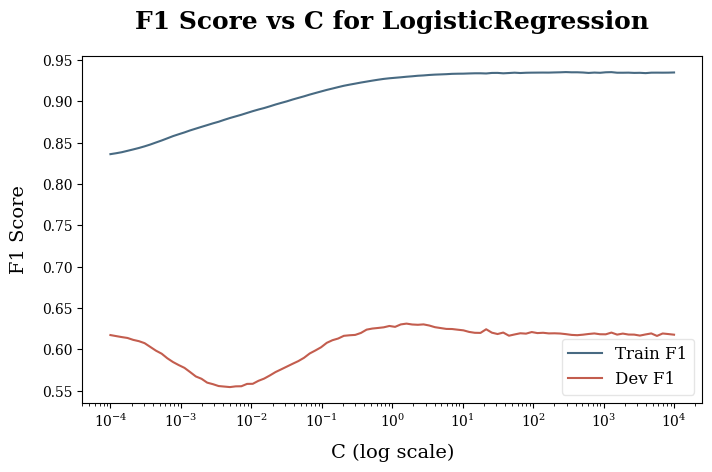

In [106]:
# Initialize lists to store metrics
train_metric = []
dev_metric = []
Cs = np.logspace(-4, 4, 100)

# Loop through each alpha value
for C in Cs:
    # Initialize the model with the current alpha
    lr = LogisticRegression(C=C)
    
    # Train the model
    model = lr.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    dev_pred = model.predict(X_dev)
    
    # Compute F1 scores
    train_metric.append(f1_score(y_train, train_pred))
    dev_metric.append(f1_score(y_dev, dev_pred))

# Create the plot
plt.rcParams.update({"font.family": "serif"})
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(Cs, train_metric, color="#486A82", label="Train F1")
ax.plot(Cs, dev_metric, color="#C35D4E", label="Dev F1")
ax.set_title("F1 Score vs C for LogisticRegression", size=18, weight="bold", pad=20)
ax.set_xlabel("C (log scale)", size=14, labelpad=10)
ax.set_ylabel("F1 Score", size=14, labelpad=10)
ax.set_xscale("log")
ax.legend(loc="best", fontsize=12, framealpha=0.5)

plt.show()

In [108]:
# Randomized search - {'solver': 'newton-cg', 'C': 3.85}
# Larger the C = slower training 
# Solver matters in terms of training speed 
# Training Speed: sag > saga > newton_cg > linlinear > lbfgs (slowest)
# For multiclass problems, only "newton-cg", "sag", "saga" and "lbfgs" handle multinomial loss
# Define the parameter distribution
lr_param = {"C": np.linspace(1, 3, 31),
            "solver": ["saga", "lbfgs", "newton-cg"]}

# Train the model
result_lr = train_val(LogisticRegression, lr_param, n_iter = 60, cv = 5)

-------- LogisticRegression --------
Best hyperparameters: {'solver': 'lbfgs', 'C': 3.0}
Best score: 0.924882
Validation Accuracy: 0.907
Validation Precision: 0.505
Validation Recall: 0.839
Validation F1 Score: 0.630
Validation ROC AUC Score: 0.877
Runtime: 466.2848732471466
------------------------------



In [110]:
## Validation

# Define the parameter distribution
lr_param = {"C": [3.0],
            "solver": ["lbfgs"]}

# Train the model
result_lr = train_val(LogisticRegression, lr_param, n_iter = 1, cv = 5)

-------- LogisticRegression --------
Best hyperparameters: {'solver': 'lbfgs', 'C': 3.0}
Best score: 0.924882
Validation Accuracy: 0.907
Validation Precision: 0.505
Validation Recall: 0.839
Validation F1 Score: 0.630
Validation ROC AUC Score: 0.877
Runtime: 10.84574818611145
------------------------------



In [112]:
## Final Evaluation on Test Set

# Initialize the estimator with best hyperparameters
lr = LogisticRegression(C = 3.0, solver = "lbfgs")
    
# Fit the model on training set 
lr.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr.predict(X_test)
    
# Final evaluation 
print(f"-------- LogisticRegression --------")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print("------------------------------\n")

-------- LogisticRegression --------
Test Accuracy: 0.822
Test Precision: 0.339
Test Recall: 0.911
Test F1 Score: 0.494
Test ROC AUC Score: 0.862
------------------------------



_Using `C = 3.0`, we slightly improved the validation F1 score from 0.627 to **0.630**.  The fine-tuned logistic regression model resulted in an F1 score of **0.494** on test set, showing **less optimal test performance** than Naive Bayes._  

#### Gradient Boosting

In [76]:
# Baseline performance
train_val(GradientBoostingClassifier, None, cv = 1)

-------- GradientBoostingClassifier --------
Validation Accuracy: 0.934
Validation Precision: 0.650
Validation Recall: 0.646
Validation F1 Score: 0.648
Validation ROC AUC Score: 0.805
Runtime: 157.1048231124878
------------------------------



,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred
0,GradientBoostingClassifier,default,0.933981,0.650485,0.646374,0.648423,0.80513,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [117]:
# Randomized search - {'n_estimators': 400, 'min_samples_split': 0.4555555555555556, 'max_features': 'sqrt', 'max_depth': 30, 'learning_rate': 0.01}
gbc_param = {"learning_rate": np.logspace(-3, -2, 10),
             "n_estimators": range(200, 600, 50),
             "min_samples_split": np.linspace(0.1, 0.5, 10),
             "max_depth": range(1, 31),
             "max_features": ["sqrt", "log2"]}

# Train the model
result_gbc = train_val(GradientBoostingClassifier, gbc_param, n_iter = 100)

-------- GradientBoostingClassifier --------
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 0.4555555555555556, 'max_features': 'sqrt', 'max_depth': 30, 'learning_rate': 0.01}
Best score: 0.880276
Validation Accuracy: 0.934
Validation Precision: 0.626
Validation Recall: 0.733
Validation F1 Score: 0.675
Validation ROC AUC Score: 0.844
Runtime: 21990.502000808716
------------------------------



In [70]:
## Validation

# Define the parameter distribution
gbc_param = {"n_estimators": [400], 
             "min_samples_split": [0.4555555555555556], 
             "max_features": ["sqrt"], 
             "max_depth": [30], 
             "learning_rate": [0.01]}

# Train the model
result_gbc = train_val(GradientBoostingClassifier, gbc_param, n_iter = 1, cv = 5)

-------- GradientBoostingClassifier --------
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 0.4555555555555556, 'max_features': 'sqrt', 'max_depth': 30, 'learning_rate': 0.01}
Best score: 0.880440
Validation Accuracy: 0.933
Validation Precision: 0.621
Validation Recall: 0.731
Validation F1 Score: 0.672
Validation ROC AUC Score: 0.842
Runtime: 663.8966751098633
------------------------------



In [72]:
## Final Evaluation on Test Set

# Initialize the estimator with best hyperparameters
gbc = GradientBoostingClassifier(n_estimators = 400, 
                                 min_samples_split = 0.4555555555555556, 
                                 max_features = "sqrt", 
                                 max_depth = 30, 
                                 learning_rate = 0.01)
    
# Fit the model on training set 
gbc.fit(X_train, y_train)

# Make predictions on test set
y_pred = gbc.predict(X_test)
    
# Final evaluation 
print(f"-------- GradientBoostingClassifier --------")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print("------------------------------\n")

-------- GradientBoostingClassifier --------
Test Accuracy: 0.885
Test Precision: 0.444
Test Recall: 0.814
Test F1 Score: 0.575
Test ROC AUC Score: 0.853
------------------------------



_Finally, we fine-tuned the gradient boosting classifier and improved the validation F1 score from 0.648 to **0.675**.  This model achieved an F1 score of **0.575** in test performance, which is the best-performing model among the three._   

### 3.2 Model Evaluation

_Lastly, we will perform the final model evaluation on the **test set** and compare the performance._  

In [129]:
## Basedline Model Test Result

# Define the models and corresponding parameter distributions
models = {"Multinomial Naive Bayes": (MultinomialNB, None, 1),
          "Logistic Regression": (LogisticRegression, None, 1),
          # "K-Nearest Neighbors": (KNeighborsClassifier, None, 1),
          # "Decision Tree": (DecisionTreeClassifier, None, 1),
          "Gradient Boosting": (GradientBoostingClassifier, None, 1)}
          # "Random Forest": (RandomForestClassifier, None, 1),
          # "Support Vector Machine": (SVC, None, 1)}
          # "MLP Classifier": (MLPClassifier, None, 1)

# Create empty list of results
results = []

# Loop through the models and append the results
for name, (model, param, cv) in models.items():
    result = train_val(model, param, cv, X_val = X_test, y_val = y_test, verbose = True)
    result["model"] = name
    results.append(result)

results_df = pd.concat(results, ignore_index = True)
results_df.sort_values("f1", ascending = False)

-------- MultinomialNB --------
Validation Accuracy: 0.850
Validation Precision: 0.376
Validation Recall: 0.877
Validation F1 Score: 0.527
Validation ROC AUC Score: 0.862
Runtime: 0.1704721450805664
------------------------------

-------- LogisticRegression --------
Validation Accuracy: 0.822
Validation Precision: 0.338
Validation Recall: 0.913
Validation F1 Score: 0.494
Validation ROC AUC Score: 0.862
Runtime: 1.6889572143554688
------------------------------

-------- GradientBoostingClassifier --------
Validation Accuracy: 0.894
Validation Precision: 0.464
Validation Recall: 0.726
Validation F1 Score: 0.566
Validation ROC AUC Score: 0.819
Runtime: 157.4616138935089
------------------------------



,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred,model
2,GradientBoostingClassifier,default,0.894182,0.464286,0.725780,0.566304,0.818839,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",Gradient Boosting
0,MultinomialNB,default,0.849964,0.376365,0.877011,0.526700,0.862065,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",Multinomial Naive Bayes
1,LogisticRegression,default,0.821876,0.338448,0.912644,0.493781,0.862485,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",Logistic Regression


In [130]:
## Fine-tuned Model Test Result

# Define the models and corresponding parameter distributions
models = {"Multinomial Naive Bayes": (MultinomialNB, nb_param, 1),
          "Logistic Regression": (LogisticRegression, lr_param, 1),
          # "K-Nearest Neighbors": (KNeighborsClassifier, None, 1),
          # "Decision Tree": (DecisionTreeClassifier, None, 1),
          "Gradient Boosting": (GradientBoostingClassifier, gbc_param, 1)}
          # "Random Forest": (RandomForestClassifier, None, 1),
          # "Support Vector Machine": (SVC, None, 1)}
          # "MLP Classifier": (MLPClassifier, None, 1)

# Create empty list of results
results = []

# Loop through the models and append the results
for name, (model, param, cv) in models.items():
    result = train_val(model, param, cv, X_val = X_test, y_val = y_test, verbose = True)
    result["model"] = name
    results.append(result)

results_df = pd.concat(results, ignore_index = True)
results_df.sort_values("f1", ascending = False)

-------- MultinomialNB --------
Best hyperparameters: {'alpha': 201.0}
Best score: 0.846231
Validation Accuracy: 0.867
Validation Precision: 0.406
Validation Recall: 0.853
Validation F1 Score: 0.551
Validation ROC AUC Score: 0.861
Runtime: 0.8281190395355225
------------------------------

-------- LogisticRegression --------
Best hyperparameters: {'solver': 'lbfgs', 'C': 3.0}
Best score: 0.924882
Validation Accuracy: 0.822
Validation Precision: 0.339
Validation Recall: 0.911
Validation F1 Score: 0.494
Validation ROC AUC Score: 0.862
Runtime: 10.833849906921387
------------------------------

-------- GradientBoostingClassifier --------
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 0.4555555555555556, 'max_features': 'sqrt', 'max_depth': 30, 'learning_rate': 0.01}
Best score: 0.879871
Validation Accuracy: 0.884
Validation Precision: 0.442
Validation Recall: 0.813
Validation F1 Score: 0.572
Validation ROC AUC Score: 0.852
Runtime: 655.3686211109161
-------------------

,estimator,best_params,accuracy,precision,recall,f1,roc_auc,y_pred,model
2,GradientBoostingClassifier,"{'n_estimators': 400, 'min_samples_split': 0.4...",0.884304,0.441512,0.813136,0.572287,0.852464,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",Gradient Boosting
0,MultinomialNB,{'alpha': 201.0},0.867454,0.406495,0.853038,0.550609,0.861004,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",Multinomial Naive Bayes
1,LogisticRegression,"{'solver': 'lbfgs', 'C': 3.0}",0.822126,0.338582,0.911002,0.493682,0.861889,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",Logistic Regression


_The **gradient boosting classifier** achieved the **highest test F1 score (0.572)** despite longer runtime, while Naive Bayes and Logistic Regression had shorter runtimes but lower F1 scores (0.551 and 0.494, respectively)._  